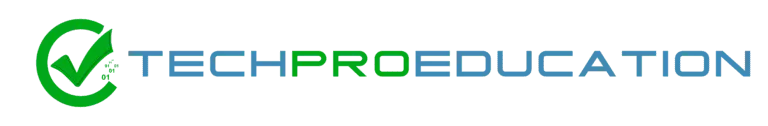

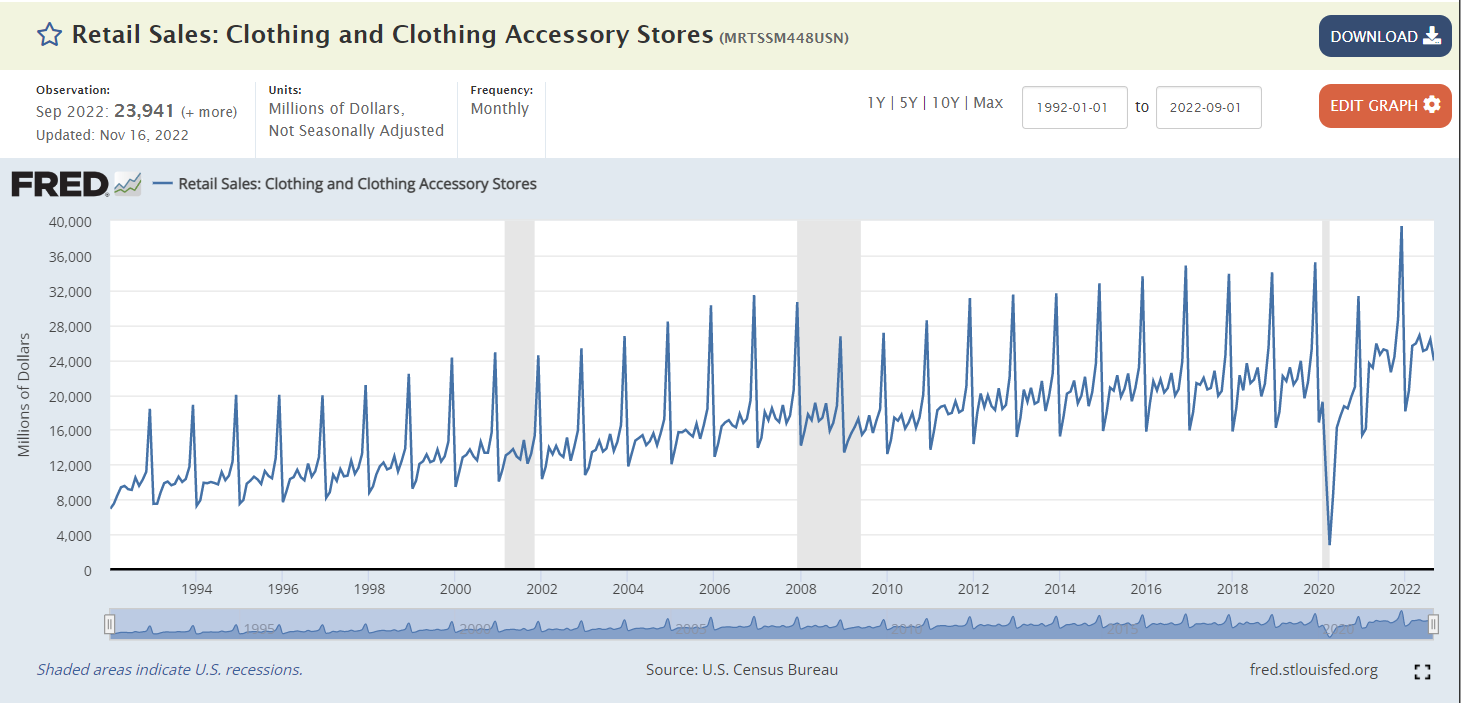

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

Bu veri, ABD'nin perakende ve gıda hizmetleri sektöründeki aylık satışlarla ilgilidir. 

"Aylık Perakende Ticaret ve Gıda Hizmetleri" verileri, perakende sektöründeki satışlar ve gıda hizmetleri faaliyetleriyle ilgili aylık verileri ifade eder. Bu veriler, tüketici harcamalarının ve ekonomik aktivitenin bir göstergesi olarak kullanılır.

Bu veriler, ABD'nin perakende sektöründeki satışları ve gıda hizmetleri faaliyetlerini kapsar. Satışlar milyonlarca dolar cinsinden ifade edilir ve mevsimsel düzeltme yapılmamıştır, yani mevsimsel etkilerin etkisi veriden çıkarılmamıştır.

Aylık perakende ticaret ve gıda hizmetleri verileri, Federal Reserve Bankası'nın FRED veritabanında bulunabilir ve düzenli olarak güncellenmektedir. Bu veriler, ekonomi analizi, trendleri değerlendirme ve tüketici harcamalarının izlenmesi gibi birçok amaçla kullanılabilir.

# RNN (Time Series)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.tail()

,RSCCASN
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
df.columns = ['Sales']

In [7]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<Axes: xlabel='DATE'>

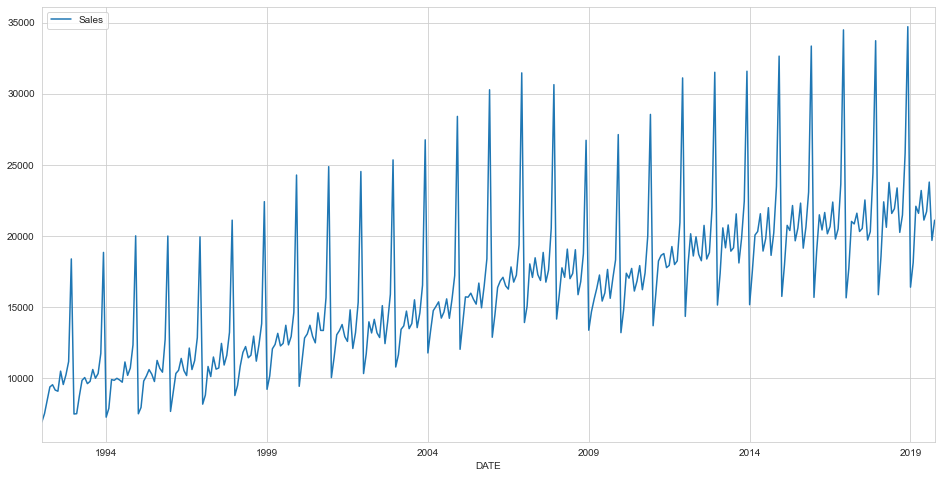

In [8]:
df.plot(figsize=(16,8))

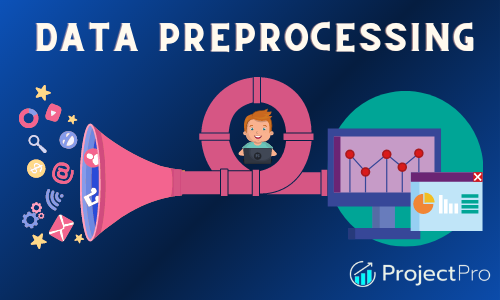

## Preprocessing of Data

### Train Test Split

In [9]:
len(df)

334

In [10]:
test_size = 24

In [11]:
test_index = len(df)- test_size
test_index

310

In [12]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [13]:
len(train)

310

In [14]:
len(test)

24

In [15]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [16]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


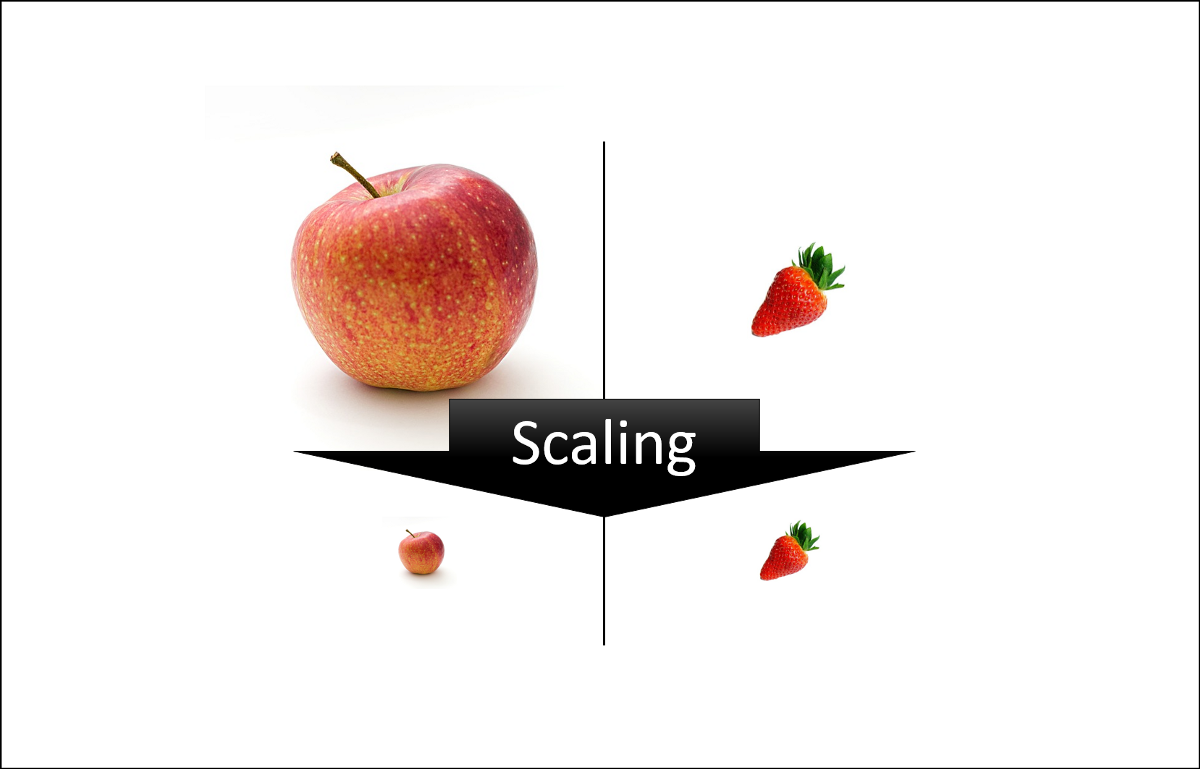

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Bu kod parçası, veri önişleme adımında yer almaktadır. scaler adlı bir ölçekleyici nesnesi kullanılarak, eğitim ve test verileri ölçeklendirilmektedir.

fit_transform() yöntemi, scaler nesnesini eğitim verilerine uygulayarak verileri ölçeklendirir ve dönüştürür. Eğitim verileri üzerinde ölçeklendirme işlemi yapılırken, ölçekleyici nesne eğitim verilerine uyum sağlamak için verileri analiz eder ve istatistiksel bilgileri kullanarak verileri ölçeklendirir.

Daha sonra, transform() yöntemi kullanılarak aynı ölçekleyici nesne, test verilerine uygulanır. Bu durumda, ölçekleyici nesne, eğitim verilerine dayalı olarak öğrendiği ölçekleme faktörlerini kullanarak test verilerini ölçeklendirir. Bu şekilde, eğitim ve test verileri aynı ölçeklendirme faktörlerine göre uygun bir şekilde dönüştürülür.

Bu işlem, verilerin ölçeklendirilerek aynı aralığa getirilmesini sağlar. Ölçeklendirme, modelin daha iyi performans göstermesine ve daha istikrarlı sonuçlar üretmesine yardımcı olabilir.

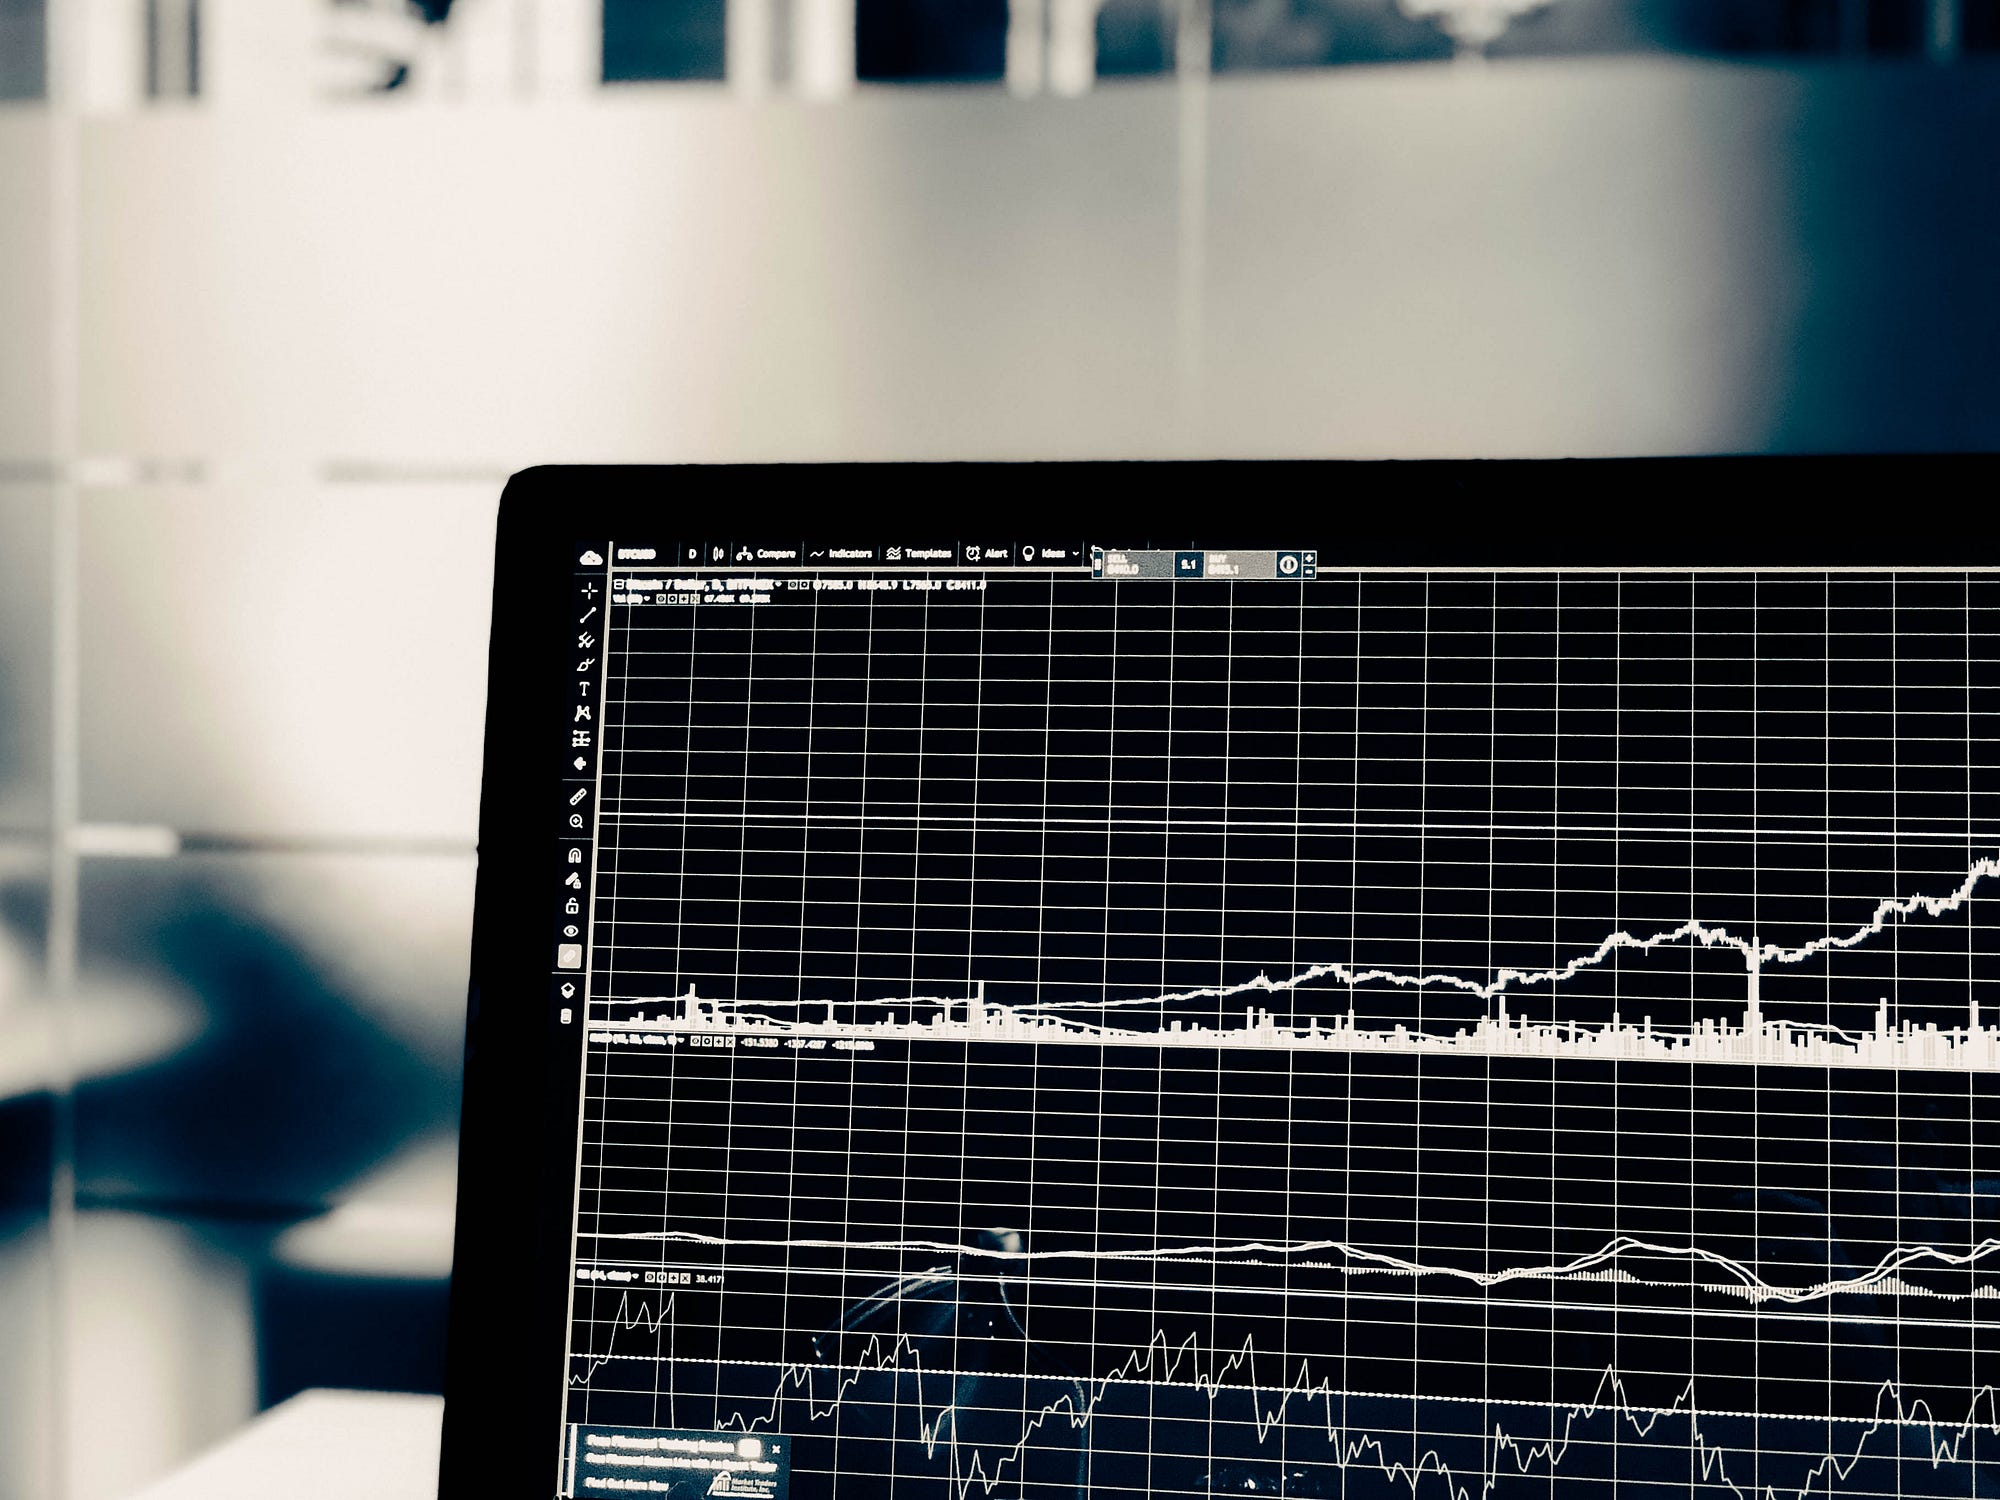

In [20]:
# Parametreler
length = 12  # Çıktı dizilerinin uzunluğu (zaman adımlarının sayısı)
batch_size = 1  # Her bir toplu işteki zaman serisi örneklerinin sayısı
stride = 1  # Ardışık çıktı dizileri arasındaki periyot

# Veri ve hedef oluşturma
data = []
targets = []

for i in range(0, len(train_scaled) - length + 1, stride):
    data.append(train_scaled[i:i+length])
    targets.append(train_scaled[i+length-1])

data = np.array(data)
targets = np.array(targets)

In [21]:
print(data)

[[[0.        ]
  [0.02127505]
  [0.05580163]
  ...
  [0.1203892 ]
  [0.15426227]
  [0.41595266]]

 [[0.02127505]
  [0.05580163]
  [0.08942056]
  ...
  [0.15426227]
  [0.41595266]
  [0.02047633]]

 [[0.05580163]
  [0.08942056]
  [0.09512053]
  ...
  [0.41595266]
  [0.02047633]
  [0.02127505]]

 ...

 [[0.4665989 ]
  [0.49237584]
  [0.60652048]
  ...
  [0.48591345]
  [0.49364653]
  [0.56629393]]

 [[0.49237584]
  [0.60652048]
  [1.        ]
  ...
  [0.49364653]
  [0.56629393]
  [0.46405751]]

 [[0.60652048]
  [1.        ]
  [0.3167659 ]
  ...
  [0.56629393]
  [0.46405751]
  [0.48536886]]]


In [22]:
print(targets)

[[0.41595266]
 [0.02047633]
 [0.02127505]
 [0.06636654]
 [0.10633895]
 [0.11345484]
 [0.09791606]
 [0.10368864]
 [0.13396747]
 [0.11163956]
 [0.12372931]
 [0.17506535]
 [0.43250799]
 [0.0124165 ]
 [0.03499855]
 [0.10829945]
 [0.10641156]
 [0.11149434]
 [0.10728289]
 [0.10154662]
 [0.1531731 ]
 [0.11904589]
 [0.13767064]
 [0.19663085]
 [0.47480395]
 [0.02105722]
 [0.03714058]
 [0.10445106]
 [0.11726692]
 [0.13367703]
 [0.12209556]
 [0.10332559]
 [0.1570578 ]
 [0.13694453]
 [0.12710572]
 [0.21104415]
 [0.47429567]
 [0.02708394]
 [0.07453529]
 [0.12383822]
 [0.13186175]
 [0.16217688]
 [0.13128086]
 [0.11850131]
 [0.18864362]
 [0.13378594]
 [0.15654952]
 [0.21554604]
 [0.47218995]
 [0.04559977]
 [0.06887162]
 [0.14166425]
 [0.11592361]
 [0.16580744]
 [0.13491141]
 [0.13781586]
 [0.20051554]
 [0.14536741]
 [0.17052716]
 [0.22894278]
 [0.51481266]
 [0.06760093]
 [0.09297851]
 [0.14249927]
 [0.17742521]
 [0.19245571]
 [0.16384694]
 [0.17045455]
 [0.21903137]
 [0.15524252]
 [0.19772001]
 [0.25

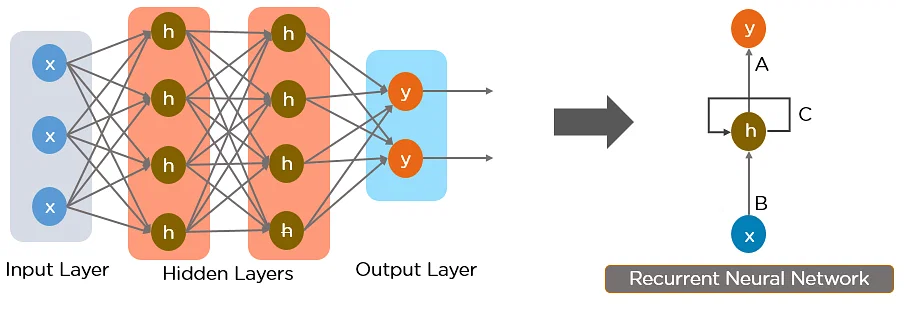

## Modelling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [24]:
train_scaled.shape

(310, 1)

In [25]:
n_features = train_scaled.shape[1]
n_features


1

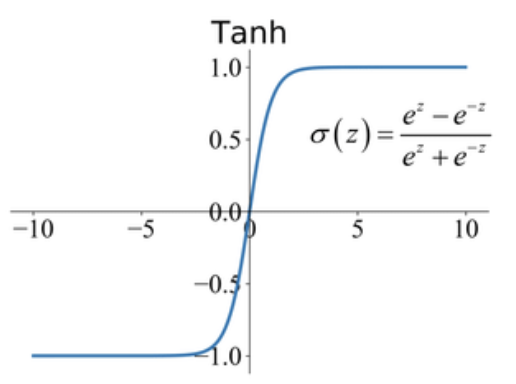

In [26]:
from keras.layers import Dropout

model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.4))  # Dropout katmanı ekleyin (Dropout oranı ayarlanabilir)
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.4))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))

In [27]:
model.compile(optimizer="adam", loss="mse")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [29]:
model.fit(data, targets, epochs = 20, batch_size=batch_size,)

Epoch 1/20
299/299 [==============================] - 4s 5ms/step - loss: 0.0848
Epoch 2/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0221
Epoch 3/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0141
Epoch 4/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0104
Epoch 5/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0074
Epoch 6/20
299/299 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 7/20
299/299 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 8/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 9/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 10/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 11/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 12/20
299/299 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 13/20
299/299 [====

<Axes: >

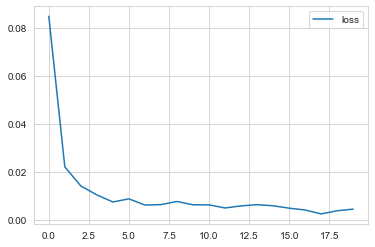

In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

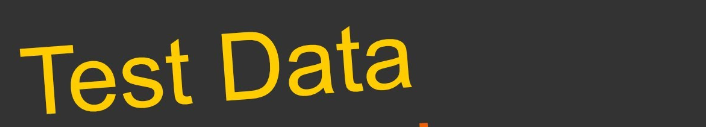

## Evaluate on Test Data

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [33]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [34]:
current_pred

array([[0.44973564]], dtype=float32)

In [35]:
current_batch

array([[[0.48875576],
        [0.48269814],
        [0.47274739],
        [0.46847159],
        [0.4639169 ],
        [0.46011621],
        [0.45753551],
        [0.4544518 ],
        [0.45355576],
        [0.45226246],
        [0.45070624],
        [0.44973564]]])

In [36]:
predictions_scaled

[array([0.48875576], dtype=float32),
 array([0.48269814], dtype=float32),
 array([0.4727474], dtype=float32),
 array([0.4684716], dtype=float32),
 array([0.4639169], dtype=float32),
 array([0.4601162], dtype=float32),
 array([0.4575355], dtype=float32),
 array([0.4544518], dtype=float32),
 array([0.45355576], dtype=float32),
 array([0.45226246], dtype=float32),
 array([0.45070624], dtype=float32),
 array([0.44973564], dtype=float32)]

In [37]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.1283952778361984 
mse: 0.0301559790969305 
rmse: 0.17365476986518538
